# 感知机

是一种简单监督机器学习算法、一种最早的神经网络架构。

在二十世纪五十年代由Rosenblatt引入。

一个感知机代表一个**二元线性分类器，采用一个 $d-1$ 维超平面把一组 $d$ 维输入向量的训练样本集合映射到二元输出值**。

给定：

- 一个数据集合 $\{(x^{(1)},y^{(1)}),\ldots,(x^{(m)},y^{(m)})\}$
- 每个 $x^{(i)}$ 都是 $d$ 维向量 $x^i=(x_1^{(i)},\ldots,x_d^{(i)})$
- 每个 $y^{(i)}$ 都是一个二元目标变量 $y^{(i)} \in \{0,1\}$

感知机就是一个很简单的神经网络：

- 拥有一个实值权重向量 $w=(w^{(1)},\ldots,w^{(d)})$
- 拥有一个实值偏置 $b$
- 采用单位阶跃函数（*Heaviside step*）作为激活函数

---

感知机采用梯度下降方法训练。

一开始初始化参数，后续则重复指定次数的训练迭代或直到参数收敛。

- 第一步

    初始化权重向量和偏置为零（或小的随机数）

- 第二步

    计算输入特性和权重的线性组合
    
    通过向量化和广播所有训练样本可一次性搞定： $a=X \cdot w + b$
    
    其中 $X$ 是矩阵 $(n_{samples},n_{features})$ 保佑全部训练样本，而 $\cdot$ 表示点积

- 第三步

    应用单位阶跃函数，返回二元值： $\hat y^{(i)}=1\, if\, a^{(i)} \geq 0,\, else\, 0$

- 第四步

    采用感知机学习规则计算权重更新： $$\nabla w=\eta X^T \cdot \Big(\hat y - y \Big)$$ $$\nabla b=\eta \Big(\hat y - y \Big)$$
    
    其中 $\eta$ 即学习率

- 第五步

    更新权重和偏置： $$w=w + \nabla w$$ $$b=b + \nabla b$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

np.random.seed(123)

## 数据集合

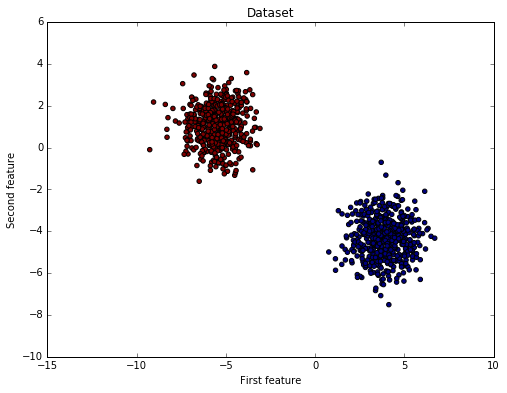

In [2]:
X, y = make_blobs(n_samples=1000, centers=2)
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [3]:
y_true = y[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y_true)
print "Shape X_train is {0}".format(X_train.shape)
print "Shape y_train is {0}".format(y_train.shape)
print "Shape X_test is {0}".format(X_test.shape)
print "Shape y_test is {0}".format(y_test.shape)

Shape X_train is (750L, 2L)
Shape y_train is (750L, 1L)
Shape X_test is (250L, 2L)
Shape y_test is (250L, 1L)


## 感知机类

In [4]:
class Perception:
    def __init__(self): pass
    def train(self, X, y, learning_rate=0.05, n_iters=100):
        n_samples, n_features = X.shape
        
        # 第一步：初始化参数
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
        
        for i in range(n_iters):
            # 第二步：计算激活
            a = np.dot(X, self.weights) + self.bias
            
            # 第三步：计算输出
            y_predict = self.step_function(a)
            
            # 第四步：计算权重更新
            dw = learning_rate * np.dot(X.T, (y - y_predict))
            db = learning_rate * np.sum(y - y_predict)
            
            # 第五步：更新参数
            self.weights += dw
            self.bias += db
            
        return self.weights, self.bias
    def step_function(self, x):
        return np.array([1 if elem >= 0 else 0 for elem in x])[:, np.newaxis]
    def predict(self, X):
        a = np.dot(X, self.weights) + self.bias
        return self.step_function(a)

## 初始化并训练模型

In [5]:
p = Perception()
w_trained, b_trained = p.train(X_train, y_train, learning_rate=0.05, n_iters=500)

## 测试

In [7]:
y_p_train = p.predict(X_train)
y_p_test = p.predict(X_test)

print "training accuracy: {0}%%".format(100 - np.mean(np.abs(y_p_train - y_train) * 100))
print "test accuracy: {0}%%".format(100 - np.mean(np.abs(y_p_test - y_test)) * 100)

training accuracy: 100.0%%
test accuracy: 100.0%%


## 可视化决策边界

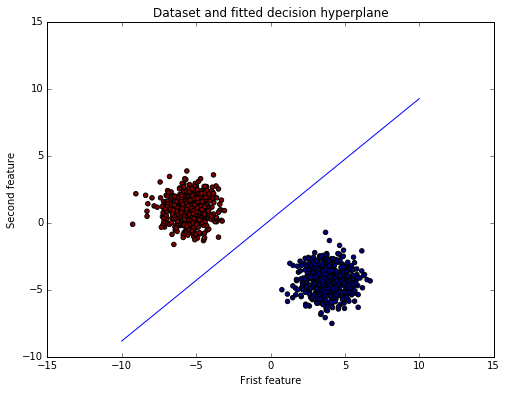

In [8]:
def plot_hyperplane(X, y, weights, bias):
    '''绘制数据集合和估计决策超平面'''
    slope = - weights[0] / weights[1]
    intercept = - bias / weights[1]
    x_hyperplane = np.linspace(-10, 10, 10)
    y_hyperplane = slope * x_hyperplane + intercept
    fig = plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.plot(x_hyperplane, y_hyperplane, "-")
    plt.title("Dataset and fitted decision hyperplane")
    plt.xlabel("Frist feature")
    plt.ylabel("Second feature")
    plt.show()

plot_hyperplane(X, y, w_trained, b_trained)